# Link Web  : https://batdongsan.com.vn/nha-dat-ban-da-nang
# Dataset: Giá bất động sản tại đà nẵng 

### Bài toán : 

Dự đoán giá bất động sản trong khu vực đà nẵng .

### Import thư viện

In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.rcParams['figure.facecolor'] = 'white'


In [24]:
batdongsan = pd.read_csv("cleaned_data.csv")
data = batdongsan.copy()


In [25]:
data.head()


,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Ra mắt siêu phẩm Sunneva Island - biệt thự đả...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,NaN
2,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
3,Chính chủ bán căn hộ Dual Key Tầng 16 dự án T...,"Phường Phước Mỹ, Sơn Trà",Bán căn hộ chung cư,120.0,NaN
4,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120.0


### Thêm cột quận 

In [26]:
arr_address = []
for i in data['Address']:

    x = str(i).split(", ")
    if len(x) == 1:
        if "P Hoà Minh" in x[0]:
            arr_address.append("liên chiểu")
        else:
            arr_address.append(x[0].strip().replace("Quận ","").lower())
    if len(x) == 2:
        if(x[1] == ' Huyện Hòa Vang'):
            arr_address.append(x[1].strip().replace("Huyện ","").lower()) 
        else :
            arr_address.append(x[1].strip().replace("Quận ","").lower()) 
           
data['district'] = pd.Series(arr_address, index=data.index)


In [27]:
arr_type = []
for i in data['Type']:
    if "biệt thự" in i:
        arr_type.append("biệt thự")
    elif "nhà phố thương mại" in i:
        arr_type.append("nhà phố thương mại")
    elif "nhà mặt phố" in i:
        arr_type.append("nhà mặt phố")
    elif "chung cư" in i:
        arr_type.append("chung cư")
    elif "đất" in i:
        arr_type.append("đất")
    elif "condotel" in i:
        arr_type.append("căn hộ")
    elif "khác" in i:
        arr_type.append("khác")
    else:
        arr_type.append("nhà")
data['estate'] = pd.Series(arr_type, index=data.index)


In [28]:
data['price_m2'] = data['Price'] / data['Area']


### EDA

#### Check giá trị null/missing

In [29]:
def basic_info(df):
    print(df.info(),'\n',df.describe(),'\n',df.isnull().sum(),'\n',data.shape)
    

In [30]:
basic_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     2000 non-null   object 
 1   Address   1998 non-null   object 
 2   Type      2000 non-null   object 
 3   Area      1998 non-null   float64
 4   Price     1483 non-null   float64
 5   district  2000 non-null   object 
 6   estate    2000 non-null   object 
 7   price_m2  1482 non-null   float64
dtypes: float64(3), object(5)
memory usage: 125.1+ KB
None 
                Area          Price     price_m2
count   1998.000000    1483.000000  1482.000000
mean     360.971827   19972.009541    82.254133
std     2203.873558   54598.359679    85.727761
min       20.500000     506.000000     0.350000
25%       94.000000    3500.000000    35.703571
50%      120.000000    5600.000000    55.000000
75%      234.400000   14900.000000    99.975000
max    40000.000000  700000.000000   825.000000 
 Title    

### Check null

In [31]:
data.isnull().sum()


Title         0
Address       2
Type          0
Area          2
Price       517
district      0
estate        0
price_m2    518
dtype: int64

In [32]:
num_cols = list(data.select_dtypes('float64'))
cat_cols = list(data.select_dtypes('object'))


In [33]:
data[cat_cols].describe().T

,count,unique,top,freq
Title,2000,1924,Bán đất chính chủ khu đô thị Nam Việt Á ven s...,3
Address,1998,75,"Phường Hòa Quý, Ngũ Hành Sơn",272
Type,2000,11,Bán đất,624
district,2000,8,ngũ hành sơn,743
estate,2000,8,đất,969


In [34]:
for col in cat_cols:
     print('Unique values for {}: {}'.format(col, data[col].unique()))
     

Unique values for Title: [' Biệt thự Sunneva Island, vị trí ngã ba sông Hàn độc tôn đẹp nhất, khu đô thị đẳng cấp nhất Đà Nẵng'
 ' Ra mắt siêu phẩm Sunneva Island - biệt thự đảo kim cương - Euro Village 3 Đà Nẵng - 0932560868'
 ' Độc nhất vô nhị - Biệt thự đảo kim cương - Đô thị đẳng cấp - Thành phố đáng sống nhất Việt Nam'
 ...
 ' Mở bán Felicia Ocenview Apart căn hộ mặt biển Đà Nẵng kế khách sạn Mường Thanh'
 ' Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi'
 ' Bán lô biệt thự 150m2 ngang 7,5m MT Trương Minh Giảng view trường học sạch đẹp. LH: 0905959760']
Unique values for Address: ['Phường Hòa Quý,  Ngũ Hành Sơn' 'Phường Phước Mỹ,  Sơn Trà'
 'Phường Hòa Xuân,  Cẩm Lệ' 'Phường Hòa Cường Nam,  Hải Châu'
 ' Liên Chiểu' 'Phường Hòa Minh,  Liên Chiểu'
 'Phường Thạc Gián,  Thanh Khê' 'Phường Hòa Hải,  Ngũ Hành Sơn'
 'Phường Mỹ An,  Ngũ Hành Sơn' 'Phường Hòa Hiệp Nam,  Liên Chiểu'
 'Phường Tân Chính,  Thanh Khê' ' Ngũ Hành Sơn' ' Sơn Trà'
 'Xã Hòa Ninh,  Hòa Vang' 'Phường  An Hải Bắc,  Sơn 

In [35]:
data[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Area,1998.0,360.971827,2203.873558,20.50,94.000000,120.0,234.400,40000.0
Price,1483.0,19972.009541,54598.359679,506.00,3500.000000,5600.0,14900.000,700000.0
price_m2,1482.0,82.254133,85.727761,0.35,35.703571,55.0,99.975,825.0


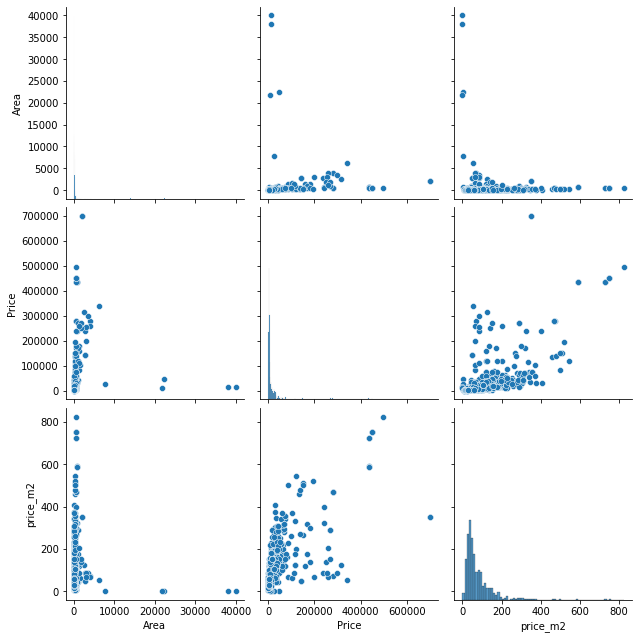

In [36]:
sns.pairplot(data,height=3)


#### Phân tích các đặc trưng

##### Area : diện tích 

<AxesSubplot:xlabel='Area', ylabel='Count'>

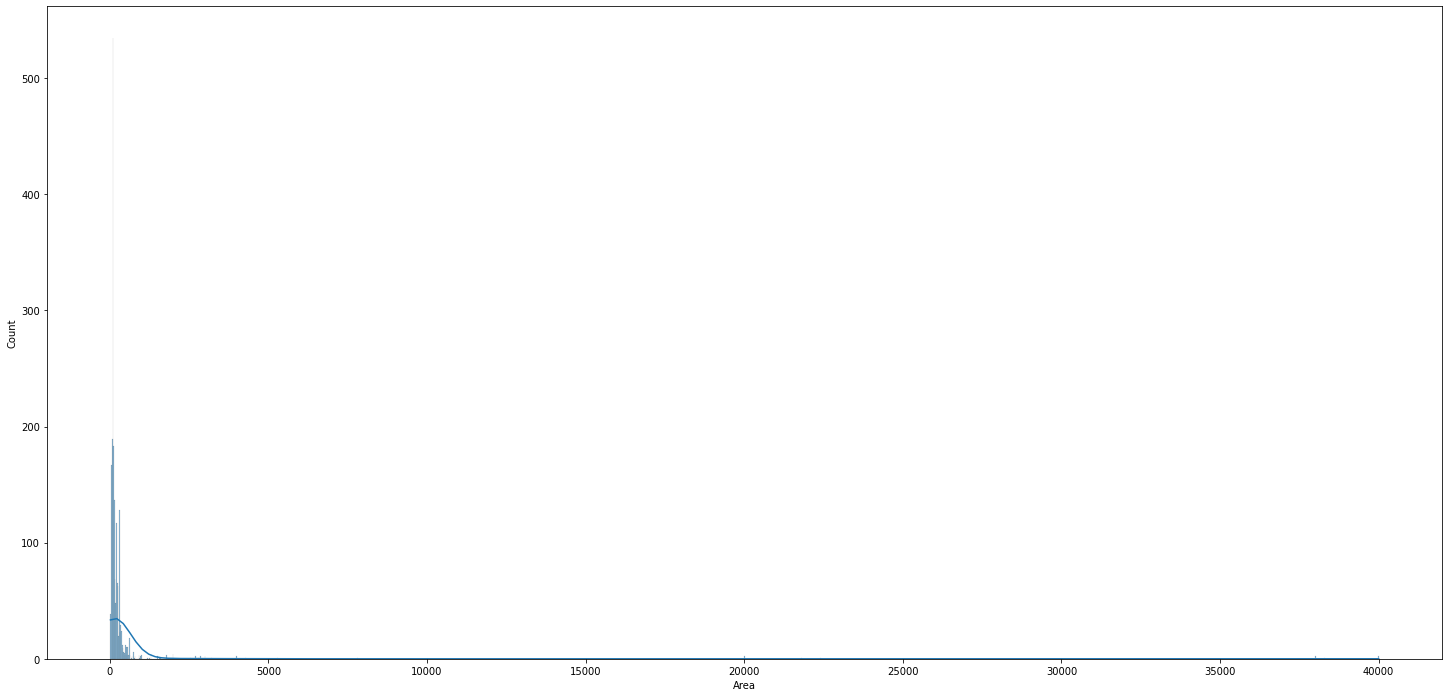

In [37]:
fig, ax = pyplot.subplots(figsize=(25,12))
sns.histplot(data=data, x="Area", kde=True)


#### Price : giá 

<AxesSubplot:xlabel='Price', ylabel='Count'>

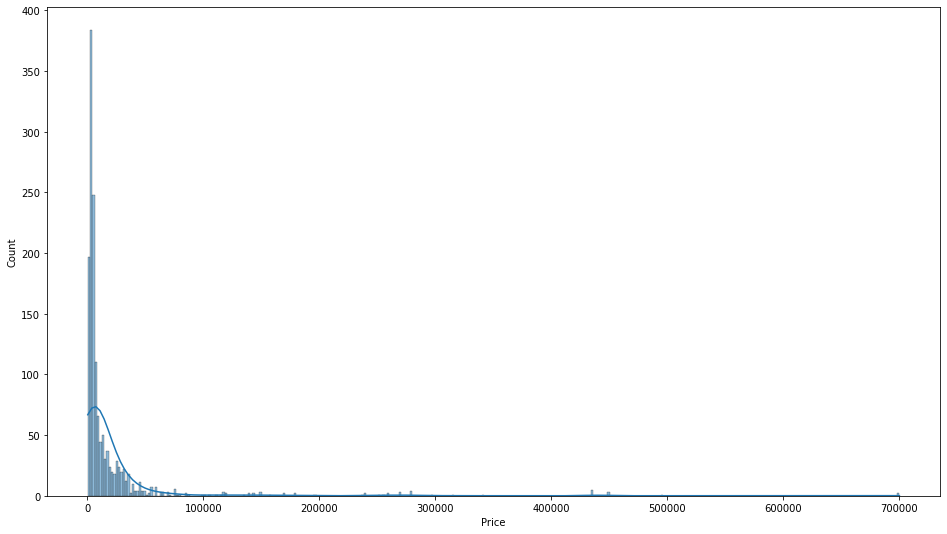

In [38]:
fig, ax = pyplot.subplots(figsize=(16,9))
sns.histplot(data=data, x="Price", kde=True)


### district : quận 

<AxesSubplot:xlabel='district', ylabel='Count'>

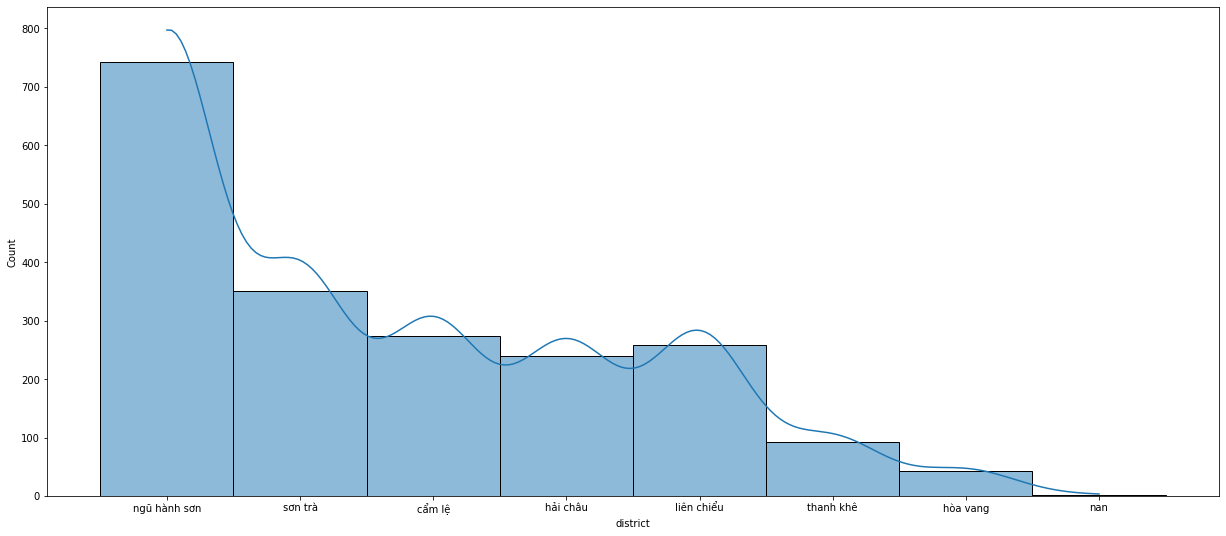

In [39]:
fig, ax = pyplot.subplots(figsize=(21,9))
sns.histplot(data=data, x="district", kde=True)


#### price_m2 

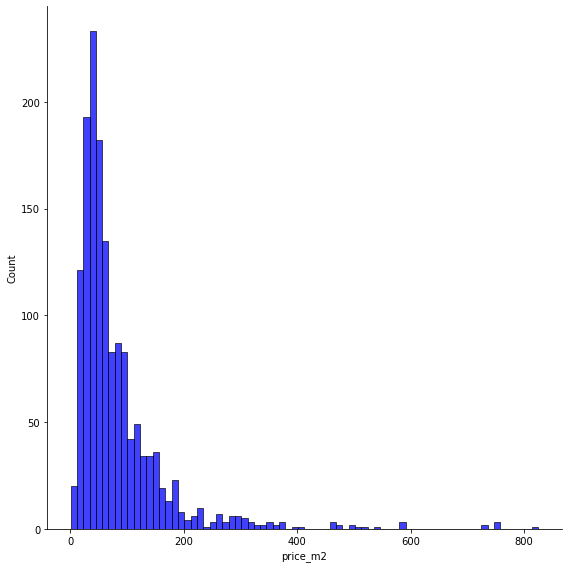

In [40]:
sns.displot(data= data, x='price_m2', kde=False , color='b', height=8)


<AxesSubplot:xlabel='Area', ylabel='Price'>

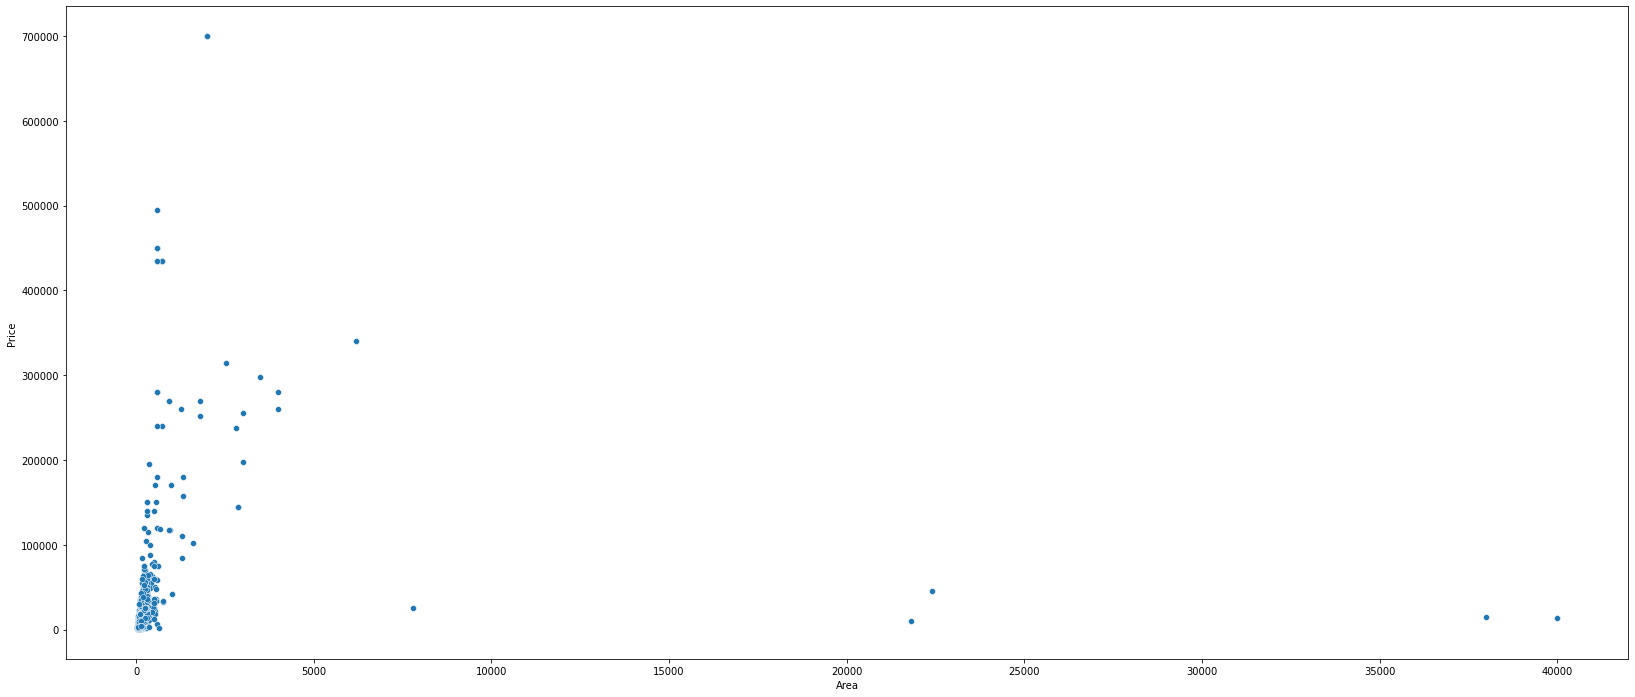

In [41]:
plt.figure(figsize=(28,12))
sns.scatterplot(data=data, x=data['Area'], y=data['Price'],palette='coolwarm')


In [42]:
def make_pie(column):
    values = data[column].value_counts()
    plt.pie(values.values, labels=values.index, autopct='%1.1f%%', startangle=90, shadow=True, rotatelabels=True)
    

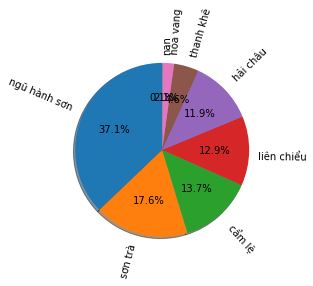

In [43]:
make_pie('district')


<AxesSubplot:xlabel='Area', ylabel='Price'>

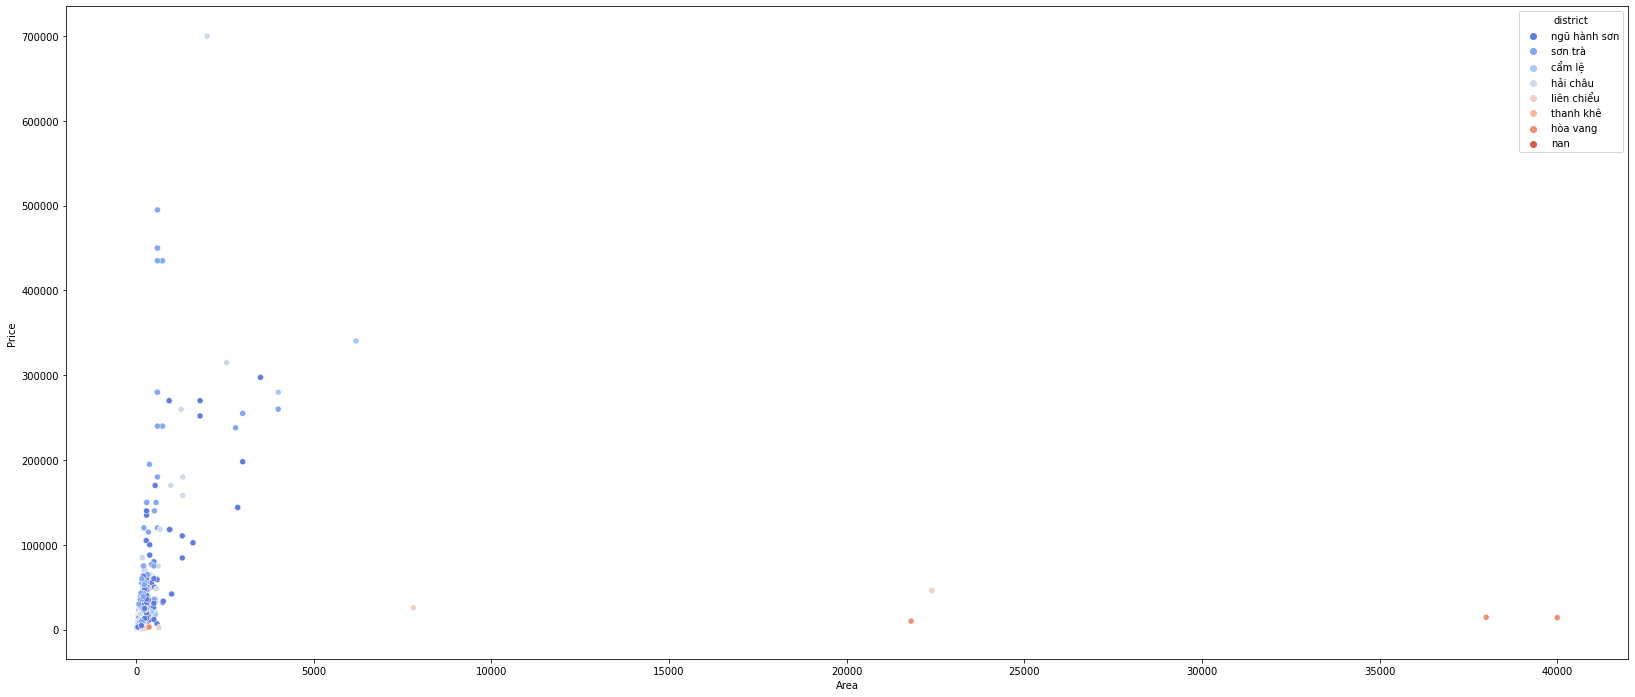

In [44]:
plt.figure(figsize=(28,12))
sns.scatterplot(data=data, x=data['Area'], y=data['Price'], hue=data['district'],palette='coolwarm')


#### 